In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-white')

In [32]:
df = pd.read_csv('customer_reduced.csv', sep=',')
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

,CustomerID,Imax,Recency,Frequency,MonetaryValue,EntropyProducts
0,12346,74215,325,1,77183.60,0.000000
1,12347,676,1,182,4310.00,4.464578
2,12348,1248,74,27,1437.24,2.987771
3,12349,630,18,72,1457.55,4.276666
4,12350,196,309,16,294.40,2.772589


In [33]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

## Hierarchical Clustering

In [34]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

### Linkage: COMPLETE

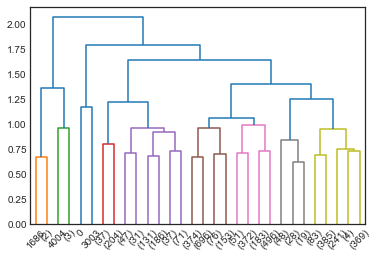

In [35]:
data_distance = pdist(X, metric='euclidean')
data_linkage = linkage(data_distance, method='complete', metric='euclidean')
res = dendrogram(data_linkage, color_threshold=1.0, truncate_mode='lastp')

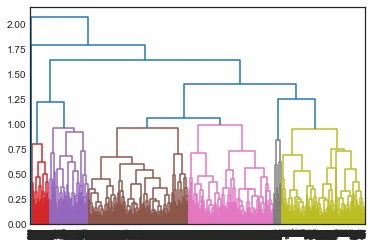

In [36]:
# No truncate mode
res = dendrogram(data_linkage, color_threshold=1.0)

### Linkage: SINGLE

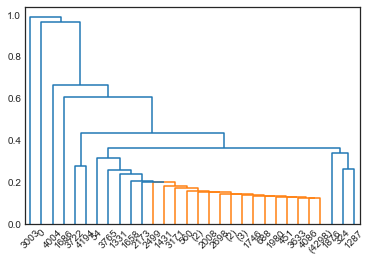

In [37]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

### Linkage: AVERAGE

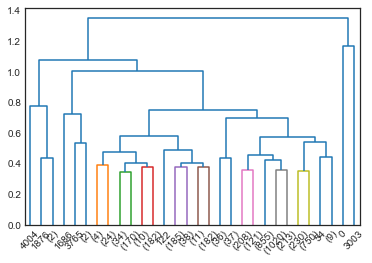

In [38]:
data_distance = pdist(X, metric='euclidean')
data_linkage = linkage(data_distance, method='average', metric='euclidean')
res = dendrogram(data_linkage, color_threshold=0.4, truncate_mode='lastp')

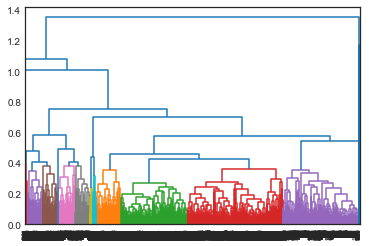

In [40]:
# No truncate mode
res = dendrogram(data_linkage, color_threshold=0.4)

Dai grafici abbiamo ricavato dei possibili valori di K (5 -> 8) da utilizzare nel K-means

## K-Means

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=5)

In [46]:
# Controllo il numero di elementi in ogni cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 497, 1094, 1072,  548, 1120], dtype=int64))

In [57]:
colormap = np.array(['#9bc693', '#95497e', '#00af37', '#5607d4', '#c87807'])

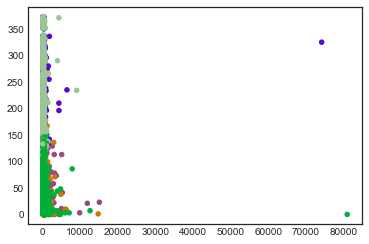

In [56]:
plt.scatter(df['Imax'], df['Recency'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

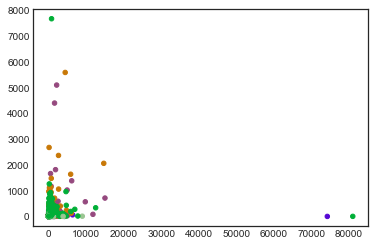

In [58]:
plt.scatter(df['Imax'], df['Frequency'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

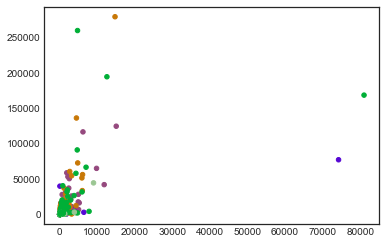

In [59]:
plt.scatter(df['Imax'], df['MonetaryValue'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

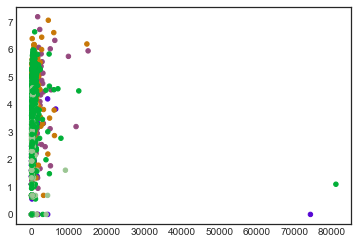

In [60]:
plt.scatter(df['Imax'], df['EntropyProducts'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

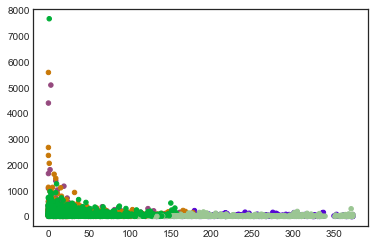

In [64]:
plt.scatter(df['Recency'], df['Frequency'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

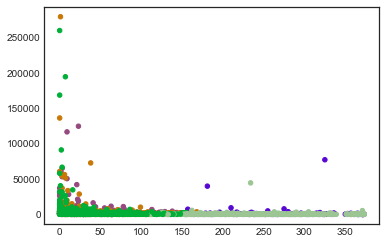

In [65]:
plt.scatter(df['Recency'], df['MonetaryValue'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

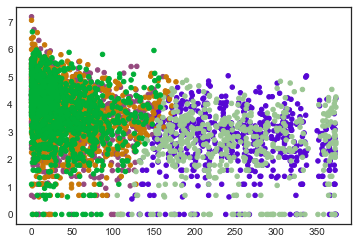

In [69]:
plt.scatter(df['Recency'], df['EntropyProducts'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

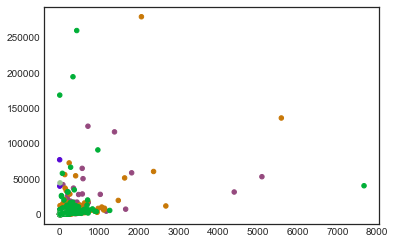

In [70]:
plt.scatter(df['Frequency'], df['MonetaryValue'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

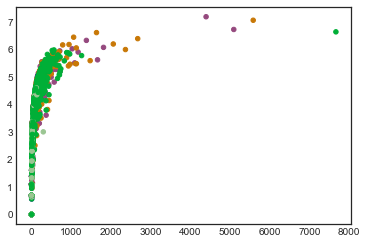

In [71]:
plt.scatter(df['Frequency'], df['EntropyProducts'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

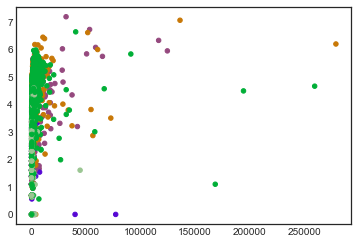

In [72]:
plt.scatter(df['MonetaryValue'], df['EntropyProducts'], 
            c=colormap[kmeans.labels_], s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()